In [26]:
#### The minimal code to run is the follow
import cleftpool <br>
cl = cleftpool.CLEFT(pfile = pfile,  npool=32) <br>
pk = cleftpool.make_table(cl, nk = 50, npool=32, z = 1)

SyntaxError: invalid syntax (<ipython-input-26-e04bf3a0b55c>, line 2)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.interpolate import UnivariateSpline as interpolateUS
import importlib

In [28]:
import multiprocessing as mp
from itertools import repeat
from functools import partial

In [29]:
import cleftpool


In [30]:
from scipy.ndimage.filters import gaussian_filter1d as gf1d
from scipy.ndimage.filters import gaussian_filter as gf

In [32]:
pfile = '/home/astrosun2/gvalogiannis/CLEFT_GSM-master/ps_python3/plin_wmap9.txt'
qfile = './plin_wmap9_cleftQ_z000.txt'
rfile = './plin_wmap9_cleftR_z000.txt'
#zvfile = './ps00_hh_RunPB_46_z000.dat'
ensfile = './plin_wmap9_cleftqfunc_z000.txt'
#ensfile2 = 'Ens_RunPB_4096_46_II_z00_fine.dat'
#ens1file = './RunPB/Ens_RunPB_4096_46_I_z00.dat'
QRfile = './plin_wmap9_cleftQ_z000.txt'
QR2file = './plin_wmap9_cleftR_z000.txt'
#zv = np.loadtxt(zvfile).T
ens = np.loadtxt(ensfile).T
#ens1 = np.loadtxt(ens1file).T
qr = np.loadtxt(QRfile).T
qr2 = np.loadtxt(QR2file).T
#qf = np.loadtxt(qfile).T
#rf = np.loadtxt(rfile).T


In [33]:
klin, plin = np.loadtxt(pfile, unpack=True)

import qfuncpool
importlib.reload(qfuncpool)
qft = qfuncpool.Qfunc(klin, plin, qfile, rfile)


IndentationError: unexpected indent (qfuncpool.py, line 536)

[]

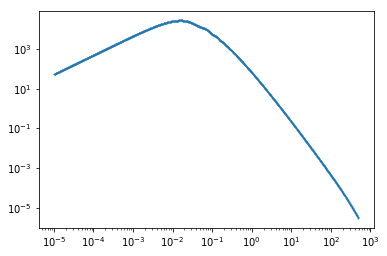

In [34]:
plt.plot(klin, plin, '.', ms=1)
plt.loglog()


In [35]:
importlib.reload(qfuncpool)
importlib.reload(cleftpool)
# cl = cleftpool.CLEFT(pfile = pfile,  npool=32)
cl = cleftpool.CLEFT(pfile = pfile, qfile=qfile, rfile=rfile,  npool=32)
pk = cleftpool.make_table(cl, nk = 50, npool=32).T

IndentationError: unexpected indent (qfuncpool.py, line 536)

In [10]:
# q1, q2 = 1e-3, 8000
# q, p = qft.xi0lin()
# q1, q2 = numpy.where(q>q1)[0][0], numpy.where(q>q2)[0][0]                                                                                             
# qv = numpy.logspace(-5, 5, 1e4)
# ip = loginterp(q[q1:q2], p[q1:q2])
# ip2 = lambda x: 10**(interp1d(q[q1-dq:q1+dq], np.log10(p[q1-dq:q1+dq]), fill_value='extrapolate')(x))
# ip3 = lambda x: 10**(interp1d(q[q2-dq:q2+dq], np.log10(p[q2-dq:q2+dq]), fill_value='extrapolate')(x))
# tmp = ip(qv)

IndexError: index 9 is out of bounds for axis 0 with size 7

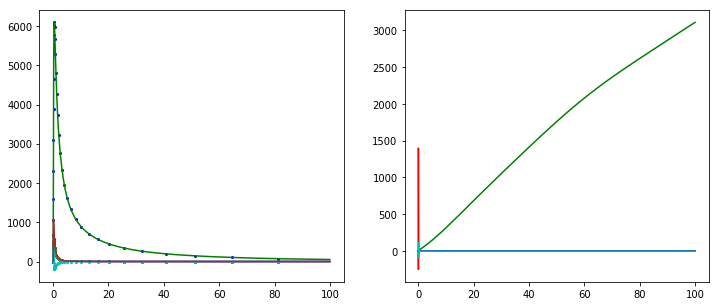

In [22]:
#Q

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 10
ms = 2

qx = cl.qf.kq.copy()
# qx = qf[0].copy()

# tp = qf[1].copy()
c = 'r'
tp = cl.qf.Q1
ax.plot(qx, tp, label = "Q1", color = c)
ax.plot(qr[0][::sk], qr[2][::sk],'o', ms = ms, color = c)
ax1.plot(qx, tp/interpolate(qr[0], qr[2])(qx), label = "Q1", color = c)

c = 'b'
tp = cl.qf.Q2
ax.plot(qx, tp, label = "Q2", color = c)
ax.plot(qr[0][::sk], qr[3][::sk],'o', ms = ms, color = c)
ax1.plot(qx, tp/interpolate(qr[0], qr[3])(qx), label = "Q2", color = c)

c = 'g'
tp = cl.qf.Q3
ax.plot(qx, tp, label = "Q3", color = c)
ax.plot(qr[0][::sk], qr[4][::sk],'o', ms = ms, color = c)
ax1.plot(qx, tp/interpolate(qr[0], qr[4])(qx), label = "Q3", color = c)

c = 'c'
tp = cl.qf.Q5
ax.plot(qx, tp, label = "Q5", color = c)
ax.plot(qr[0][::sk], qr[6][::sk],'o', ms = ms, color = c)
ax1.plot(qx, tp/interpolate(qr[0], qr[6])(qx), label = "Q5", color = c)

c = 'brown'
tp = cl.qf.Q8
ax.plot(qx, tp, label = "Q8", color = c)
ax.plot(qr[0][::sk], qr[9][::sk],'o', ms = ms, color = c)
ax1.plot(qx, tp/interpolate(qr[0], qr[9])(qx), label = "Q8", color = c)

c = 'orange'
tp = (cl.qf.ilQs2(qx))
tp2 = 7/2.*(qr2[5])
ax.plot(qx, abs(tp), label = "Qs2", color = c)
ax.plot(qr[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
ax1.plot(qx, tp/interpolate(qr2[0], tp2)(qx), label = "Qs2", color = c)

ax.legend(loc = 0, ncol = 2)
ax.set_ylim(1e-2,1e4)
ax.set_yscale('log')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,1.5)
ax.legend(loc = 0)

for ax in axar:
    ax.set_xlim(1e-3,1e3)
    ax.set_xscale('log')
plt.suptitle('Compare Q')
# plt.savefig('./plots/Q.pdf')

plt.show()

Text(0.5,0.98,'Compare R')

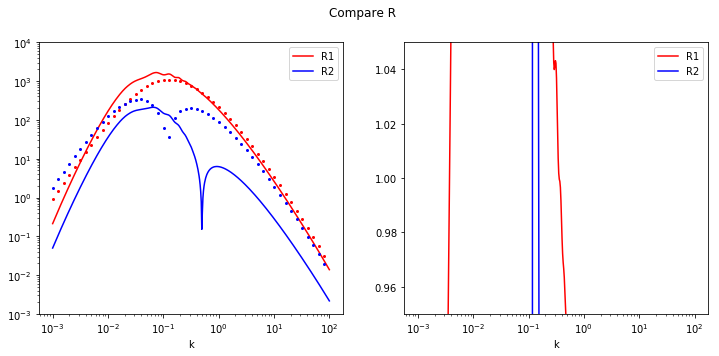

In [23]:
#R

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 10
ms = 2

# rx = rf[0].copy()
rx = cl.qf.kr.copy()

# tp = (rf[1]).copy()
c = 'r'
tp = cl.qf.R1.copy()
ax.plot(rx, abs(tp), label = "R1", color = c)
ax.plot(qr[0][::sk], abs(qr[-2][::sk]),'o', ms = ms, color = c)
ax1.plot(rx, tp/interpolate(qr[0], qr[-2])(rx), label = "R1", color = c)

# tp = (rf[2]).copy()
c = 'b'
tp = cl.qf.R2.copy()
ax.plot(rx, abs(tp), label = "R2", color = c)
ax.plot(qr[0][::sk], abs(qr[-1][::sk]),'o', ms = ms, color = c)
ax1.plot(rx, tp/interpolate(qr[0], qr[-1])(rx), label = "R2", color = c)

ax.legend(loc = 0)
ax.set_ylim(1e-3,1e4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax.legend(loc = 0)
ax.set_xscale('log')
ax.set_xlabel('k')
plt.suptitle('Compare R')
# plt.savefig('./plots/R.pdf')



In [24]:
def tpsmall(lab, q, a, l = 1e-2):
    '''Print where the function (a) exceed the limit l'''
    mid = np.where(q >1)[0][0]
    mid2 = np.where(q >100)[0][0]
    try:
        q1 = q[np.where(a[:mid] <l)[0][-1]]
    except:
        q1 = 'Big'
    try:
        q2 = q[mid2 + np.where(a[mid2:] <l)[0][0]]
    except:
        q2 = 'Big'
    print(lab, q1, q2)

In function -  xi0lin


NameError: name 'ens' is not defined

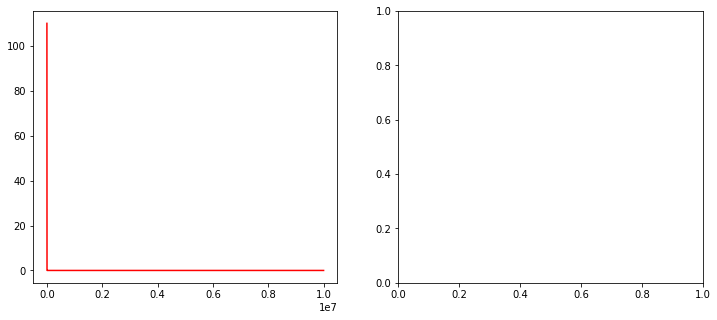

In [25]:
#xi
qv = cl.qv.copy()
qil,  qih = np.where(qv>1e-2)[0][0], np.where(qv>300)[0][0]
qil, qih

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 2

col, tp, lab, c = 2, cl.qf.xi0lin()[1], 'E0lin', 'r'
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(ens[col][::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], ens[col])(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], ens[col])(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

col, tp, lab, c = 3, cl.qf.xi2lin()[1], 'E2lin', 'b'
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(ens[col][::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], ens[col])(qv), label = lab, color = c)
tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
tpsmall(lab, qv, tp)
# ax1.plot(qv, tpi/interpolate(ens[0], ens[col])(qv), label = lab, color = c)

tp, lab, c =  cl.qf.xi0loop()[1], 'E0loop', 'g'
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(ens[6:8].sum(axis = 0)[::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], ens[6:8].sum(axis = 0))(qv), label = lab, color = c)
tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], ens[6:8].sum(axis = 0))(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

tp, lab, c =  cl.qf.xi2loop()[1], 'E2loop', 'c'
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(ens[8:10].sum(axis = 0)[::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], ens[8:10].sum(axis = 0))(qv), label = lab, color = c)
tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], ens[8:10].sum(axis = 0))(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

col, tp, lab, c = 10, cl.qf.xi1loop()[1], 'E1loop', 'orange'
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(ens[col][::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], ens[col])(qv), label = lab, color = c)
tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], ens[col])(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

col, tp, lab, c = 11, cl.qf.xi3loop()[1], 'E3loop', 'brown'
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(ens[col][::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], ens[col])(qv), label = lab, color = c)
# ax1.plot(qv, gf1d(tp, 2)/interpolate(ens[0], ens[col])(qv), label = lab, color = c, ls ="--")
tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], ens[col])(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], gf1d(tp[qil:qih], 1))(qv)
tpsmall(lab, qv, tp)

# ax.set_ylim(1e-4,1e4)
# ax.set_yscale('log')

ax.legend(loc = 0, ncol = 2)

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)

for ax in axar:
    ax.legend(loc = 0, ncol = 2)
    ax.set_xscale('log')
    ax.set_xlabel('q', fontsize = 12)
    ax.set_xlim(1e-7, 2e3)
    ax.axvline(200, color = 'k', ls = ":")
    
plt.suptitle('Compare Ens')
# plt.savefig('./plots/Ens.pdf')




Xlin 0.0484918292061 Big
Xloop 0.00550141044167 Big
Ylin 0.0360541860568 9894.62956996
Yloop 0.00385264129939 306.160102672


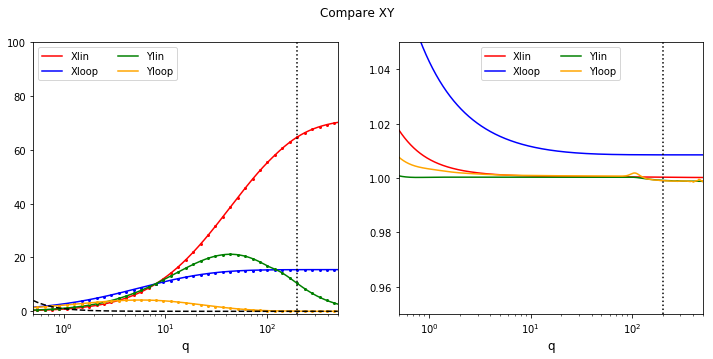

In [32]:

#xi
qv = cl.qv.copy()
qil,  qih = np.where(qv>1e-2)[0][0], np.where(qv>400)[0][0]

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 2

tp, lab, c = cl.Xlin, 'Xlin', 'r'
tp2 = 2/3.*abs(ens[1] - ens[2] - ens[3])
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], tp2[::sk],'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

tp, lab, c = cl.Xloop, 'Xloop', 'b'
tp2 = 2/3.*abs(ens[4] + ens[5] - ens[6:10].sum(axis =0))
# tp2 = abs(ens[-6] + ens[-4]) #What is this?
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], tp2[::sk],'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

tp, lab, c = cl.Ylin, 'Ylin', 'g'
tp2 = 2*abs(ens[3])
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], tp2[::sk],'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

tp, lab, c = cl.Yloop, 'Yloop', 'orange'
tp2 = 2*abs(ens[8:10].sum(axis =0))
# tp2 = abs(ens[-5] + ens[-5]) #What is this?
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], tp2[::sk],'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

ax.plot(qv,qv**-2, 'k--')

# ax.set_ylim(1e-5,1e4)
ax.set_ylim(-1,1e2)
# ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax.legend(loc = 0, ncol = 2)
for ax in axar:
    ax.set_xscale('log')
    ax.set_xlabel('q', fontsize = 12)
    ax.set_xlim(5e-1, 5e2)
    ax.axvline(200, color = 'k', ls = ":")

plt.suptitle('Compare XY')
# plt.savefig('./plots/XY.pdf')




x10(/2) 0.00350069613798 Big
x20 0.00538732452102 142.697196734
y10(/2) 0.00187252335324 300.709961321
y20 0.997240436166 100.230546889


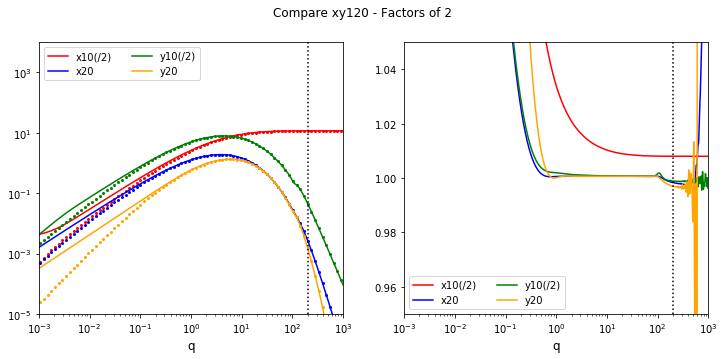

In [30]:
#xi
qv = cl.qv.copy()
qil,  qih = np.where(qv>1e-2)[0][0], np.where(qv>200)[0][0]

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 2

c = 'r'
tp, lab = cl.x10, 'x10(/2)'
tp2 = ens[-6]
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

c = 'b'
tp, lab = cl.x20, 'x20'
tp2 =1.* ens[-4]
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

c = 'g'
tp, lab = cl.y10, 'y10(/2)'
tp2 =1/1.* ens[-5]
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

c = 'orange'
tp, lab = cl.y20, 'y20'
tp2 =1.* ens[-3]
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)


# ax.set_ylim(-1,15)
ax.set_ylim(1e-5,1e4)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
# ax.set_xscale('log')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')

for ax in axar:
    ax.set_xscale('log')
    ax.set_xlim(1e-3, 1e3)
    ax.set_xlabel('q', fontsize = 12)

    ax.axvline(200, color = 'k', ls = ":")

plt.suptitle('Compare xy120 - Factors of 2')
# plt.savefig('./plots/xy120.pdf')




u11 0.997240436166 100.230546889


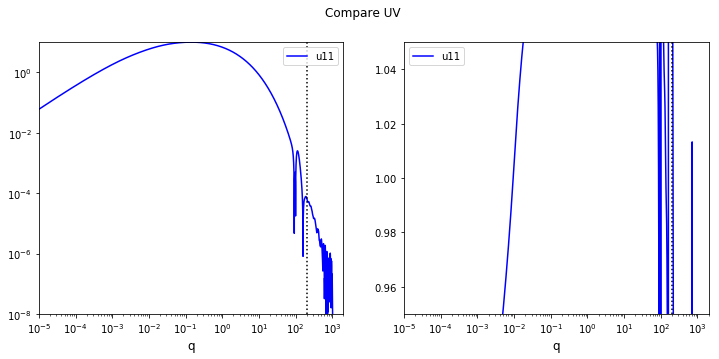

In [132]:
#xi
qv = cl.qv.copy()
qil,  qih = np.where(qv>1e-2)[0][0], np.where(qv>200)[0][0]
qil, qih

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 0

# c = 'r'
# tp, lab = cl.u20, 'u20'
# tp2 = ens[18]
# ax.plot(qv, abs(tp), label = lab, color = c)
# ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
# # ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpsmall(lab, qv, tp)

c = 'b'
tp, lab = cl.u11, 'u11'
tp2 = ens[17] 
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
# ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)


# c = 'g'
# tp, lab = cl.v10, 'v10'
# tp2 = ens[19]
# ax.plot(qv, abs(tp), label = lab, color = c)
# ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
# # ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tpi/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpsmall(lab, qv, tp)


# c = 'c'
# tp, lab = cl.v12, 'v12'
# tp2 = ens[20]
# ax.plot(qv, abs(tp), label = lab, color = c)
# ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpsmall(lab, qv, tp)


# c = 'orange'
# tp, lab = cl.u10, 'u10'
# tp2 = ens[15] #+ ens[16]
# ax.plot(qv, abs(tp), label = lab, color = c)
# ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpsmall(lab, qv, tp)

# c = 'brown'
# tp, lab = cl.u30, 'u3'
# tp2 = ens[16]
# ax.plot(qv, abs(tp), label = lab, color = c)
# ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
# tpi = qft.loginterp(qv[qil:qih], tp[qil:qih])(qv)
# ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
# tpsmall(lab, qv, tp)

# ax.plot(qv,qv**-2, 'k--')

ax.set_ylim(1e-8,1e1)
ax.set_yscale('log')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)

for ax in axar:
    ax.set_xscale('log')
    ax.set_xlabel('q', fontsize = 12)
    ax.set_xlim(1e-5, 2e3)
    ax.axvline(200, color = 'k', ls = ":")
    ax.legend(loc = 0, ncol = 2)
    
plt.suptitle('Compare UV')
# plt.savefig('./plots/uv.pdf')



chi Big 100.230546889
corr Big 100.230546889
zeta Big 100.230546889


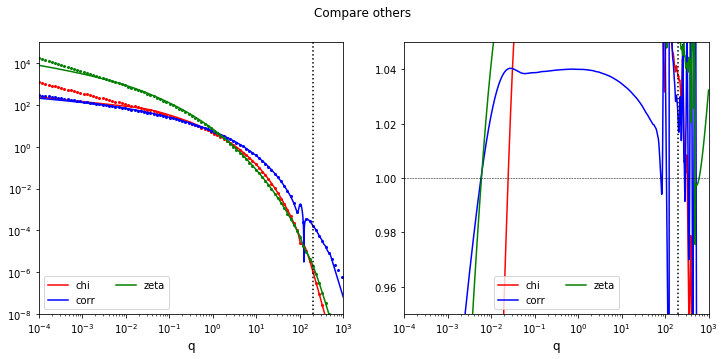

In [104]:

#xi
qv = cl.qv.copy()

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 2

c = 'r' 
tp, lab = cl.chi, 'chi'
tp2 = ens[14]
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)

c = 'b' 
tp, lab = cl.corr, 'corr'
tp2 = ens[12] 
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)


c = 'g' 
tp, lab = cl.zeta, 'zeta'
tp2 = ens[13]
ax.plot(qv, abs(tp), label = lab, color = c)
ax.plot(ens[0][::sk], abs(tp2[::sk]),'o', ms = ms, color = c)
ax1.plot(qv, tp/interpolate(ens[0], tp2)(qv), label = lab, color = c)
tpsmall(lab, qv, tp)


ax.set_ylim(1e-8,1e5)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')
ax.axhline(1, color='k', ls='--',lw= 0.5)

for ax in axar:
    ax.set_xlabel('q', fontsize = 12)
    ax.set_xlim(1e-4, 1000)
    ax.axvline(200, color = 'k', ls = ":")
plt.suptitle('Compare others')
# plt.savefig('./plots/others.pdf')




### Compare your and ZV spectra upon using ZV's ENSFile


In [142]:
pfile = './pklin_RunPB.txt'
zvfile = '../../data/RunPB/PTdata/ps00_hh_RunPB_46_z100.dat'
M = (0.0220 + 0.1171)/0.69**2 #RunPB

# pfile = '../../data/DarkSky/PS_lin_z000.dat'
# zvfile = '../../data/DarkSky/PS_hh_46_z100.dat'
# M = (0.0221396 + 0.11754)/0.688062**2 #DARKSKY

# pfile = '../../data/ANL/ANL15_matterpower.out'
# zvfile = '../../data/ANL/PS_hh_46_z100.dat'
# M = (0.02258 + 0.11090568)/0.71**2 #ANL
zv = np.loadtxt(zvfile).T


importlib.reload(qfuncpool)
importlib.reload(cleftpool)
cl = cleftpool.CLEFT(pfile = pfile, npool = 32)
# cl = cleftpool.CLEFT(pfile = pfile, ensfile=ensfile, npool=32)
pk = cleftpool.make_table(cl, nk = 50, npool=32, z = 1, M = M).T

Evaluating Q integrals. Recommend saving them
Evaluating R integrals. Recommend saving them
Q & R kernels created


/global/homes/c/chmodi/.conda/envs/ipynersc35/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In function -  xi0lin


/global/homes/c/chmodi/.conda/envs/ipynersc35/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In function -  xi0loop13
In function -  xi0loop22
Matter q-functions created
In function -  x10j0
In function -  corr
Bias(local) q-functions created
In function -  js2
In function -  zeta
In function -  zeta
In function -  zeta
Shear q-functions created


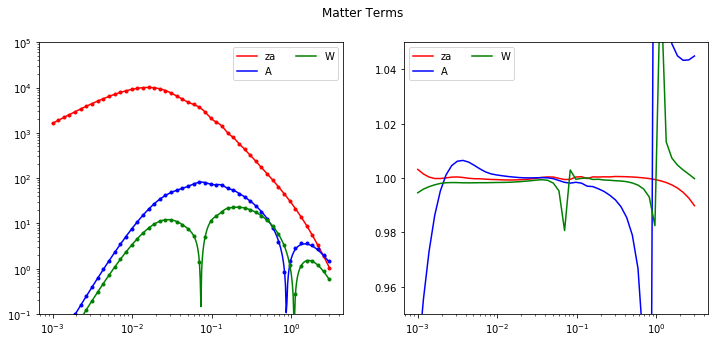

In [143]:
#xi
qv = cl.qv.copy()

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 3

c = 'r' 
col, lab = 1, 'za'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'b' 
col, lab = 2, 'A'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'g' 
col, lab = 3, 'W'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

# c= 'orange'
# tp, tp2 , lab = pk[1:4].sum(axis = 0), zv[1:4].sum(axis = 0), 'Matter'
# ax.plot(zv[0], abs(tp2), label = lab, color = c)
# ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
# ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)



ax.set_ylim(1e-1,1e5)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')
plt.suptitle('Matter Terms')
# plt.savefig('./plots/matter.pdf')




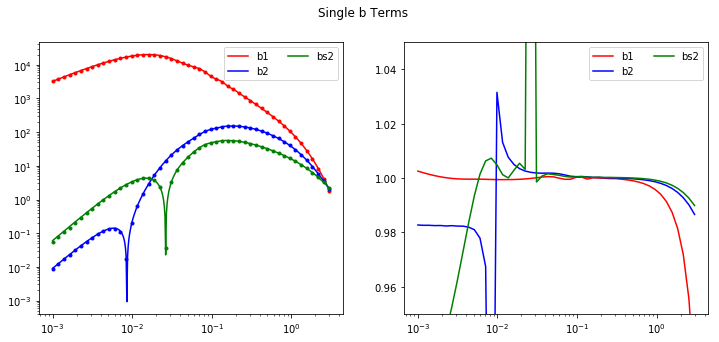

In [144]:
#xi
qv = cl.qv.copy()

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 3

c = 'r'
col, lab = 4, 'b1'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'b'
col, lab = 6, 'b2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'g'
col, lab = 9, 'bs2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)


# ax.set_ylim(1e-1,1e5)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')
plt.suptitle('Single b Terms')
# plt.savefig('./plots/cross.pdf')



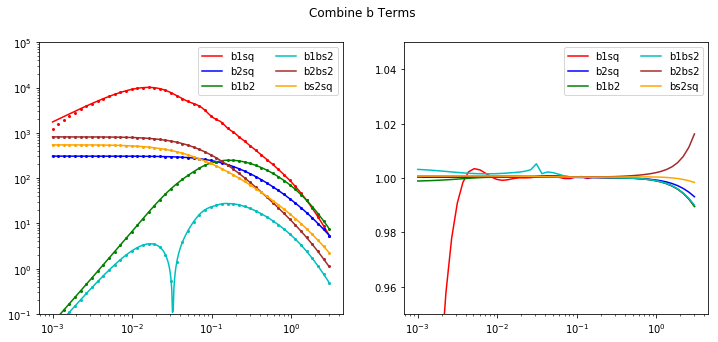

In [145]:
#xi
qv = cl.qv.copy()

fig, axar = plt.subplots(1, 2, figsize = (12, 5))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 2

c = 'r'
col, lab = 5, 'b1sq'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'b'
col, lab = 7, 'b2sq'
tp, tp2 = pk[col], zv[col]/4.
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'g'
col, lab = 8, 'b1b2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'c'
col, lab = 10, 'b1bs2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'brown'
col, lab = 11, 'b2bs2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'orange'
col, lab = 12, 'bs2sq'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)




ax.set_ylim(1e-1,1e5)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')

ax = axar[1]
ax.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')
plt.suptitle('Combine b Terms')
# plt.savefig('./plots/auto.pdf')




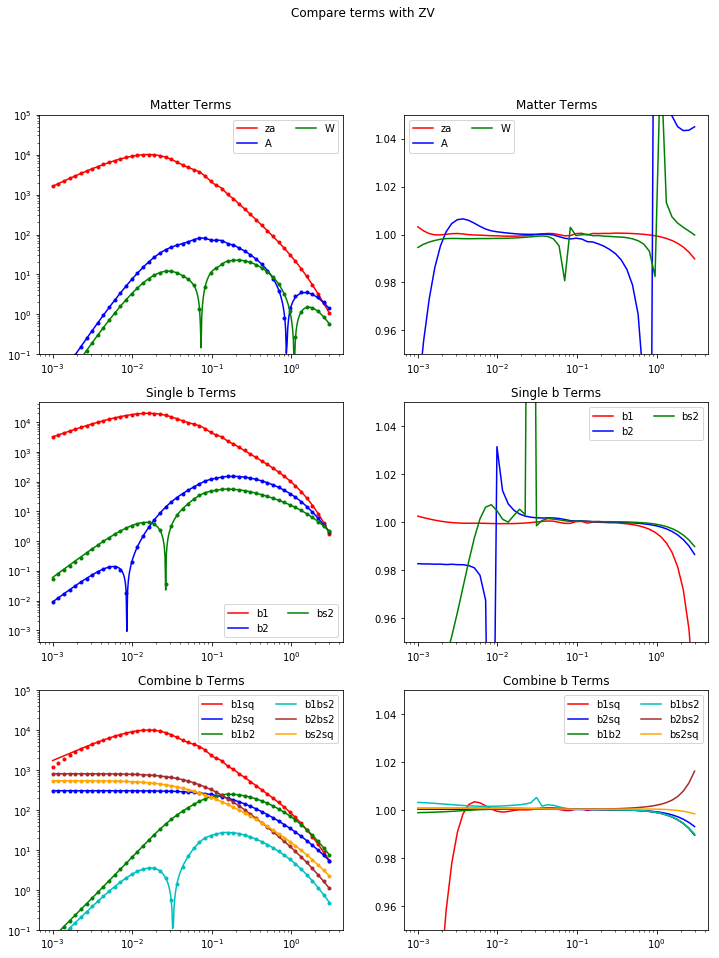

In [149]:
#xi
qv = cl.qv.copy()

fig, axar = plt.subplots(3, 2, figsize = (12, 15))

ax = axar[0]
ax1 = axar[1]
sk = 30
ms = 2

#xi
qv = cl.qv.copy()

#xi
qv = cl.qv.copy()


ax = axar[0, 0]
ax1 = axar[0, 1]
sk = 30
ms = 3

c = 'r' 
col, lab = 1, 'za'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'b' 
col, lab = 2, 'A'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'g' 
col, lab = 3, 'W'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

# c= 'orange'
# tp, tp2 , lab = pk[1:4].sum(axis = 0), zv[1:4].sum(axis = 0), 'Matter'
# ax.plot(zv[0], abs(tp2), label = lab, color = c)
# ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
# ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)



ax.set_ylim(1e-1,1e5)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')
ax.set_title('Matter Terms')

ax1.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax1.legend(loc = 0, ncol = 2)
ax1.set_xscale('log')
ax1.set_title('Matter Terms')
# plt.savefig('./plots/matter.pdf')



ax = axar[1, 0]
ax1 = axar[1, 1]

c = 'r'
col, lab = 4, 'b1'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'b'
col, lab = 6, 'b2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'g'
col, lab = 9, 'bs2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)


# ax.set_ylim(1e-1,1e5)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')
ax.set_title('Single b Terms')

ax1.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax1.legend(loc = 0, ncol = 2)
ax1.set_xscale('log')
ax1.set_title('Single b Terms')
# plt.savefig('./plots/cross.pdf')

ax = axar[2, 0]
ax1 = axar[2, 1]

c = 'r'
col, lab = 5, 'b1sq'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'b'
col, lab = 7, 'b2sq'
tp, tp2 = pk[col], zv[col]/4.
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'g'
col, lab = 8, 'b1b2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'c'
col, lab = 10, 'b1bs2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'brown'
col, lab = 11, 'b2bs2'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)

c = 'orange'
col, lab = 12, 'bs2sq'
tp, tp2 = pk[col], zv[col]
ax.plot(zv[0], abs(tp2), label = lab, color = c)
ax.plot(pk[0], abs(tp),'o', ms = ms, color = c)
ax1.plot(pk[0], tp/interpolate(zv[0], tp2)(pk[0]), label = lab, color = c)




ax.set_ylim(1e-1,1e5)
ax.set_yscale('log')
ax.legend(loc = 0, ncol = 2)
ax.set_xscale('log')
ax.set_title('Combine b Terms')

ax1.set_ylim(0.95,1.05)
# ax.set_ylim(0.5,3)
ax1.legend(loc = 0, ncol = 2)
ax1.set_xscale('log')
ax1.set_title('Combine b Terms')
# plt.savefig('./plots/auto.pdf')

plt.suptitle('Compare terms with ZV')
